# Esercitazione 4 - 11 Marzo 2025
 

In [45]:
import numpy as np
import matplotlib.pyplot as plt

Esplorate le caratteristiche dell'insieme dei numeri di macchina F($\beta$,t,L,U) sul vostro calcolatore utilizzando il comando sys.float_info, dopo aver importato im modulo sys:

In [5]:
import sys
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


- **1.**  Calcolare lo spacing in  $[2^{52}, 2^{53}]$.
    - Sia $x=2^{52}$ individuare il numero successivo a $2^{52}$ ed assegnarlo ad una variabile  y.
    - Cosa succede se consideriamo il valore z=x+0.5?
    - Cosa succede se consideriamo il valore q=y+0.5?
  

In [7]:
p=52
t=53
beta=2.0
spacing=beta**(p+1-t)
print("spacing:", spacing)
x=beta**p
y=x+spacing
print("x:", x)
print("y:", y)
z = x + 0.5
q = y + 0.5
print("z:", z) # 0.5 < spacing, round to nearest even (smaller)
print("q:", q) # 0.5 < spacing, round to nearest even (bigger)

spacing: 1.0
x: 4503599627370496.0
y: 4503599627370497.0
z: 4503599627370496.0
q: 4503599627370498.0


- **2** Calcolare la cardinalità dell'insieme dei numeri finiti di Python

In [8]:
L = 1022 # min exponent (negative)
U = 1023 # max exponent
cardinality=2 * (beta - 1) * (beta ** (t-1)) * (U - L + 1) + 1
print(cardinality)

1.8014398509481984e+16


- **3**  Verificare numericamente che $\texttt{eps} = 2^{-52}$, spacing nell'intervallo $[1, 2]$,
è il piu' piccolo $x$ tale che $fl(1 + x)$ è  diverso da $1$.

In [22]:
p = 0 # exponent for 1, min in the interval
spacing = beta ** (p + 1 - t)
eps = 2 ** -52
print("spacing:", spacing)
print("eps:", eps)
x = 1.0 + spacing
print("x:", x)
y = 1.0 + (spacing / 2) # reduce spacing
print("y:", y)

spacing: 2.220446049250313e-16
eps: 2.220446049250313e-16
x: 1.0000000000000002
y: 1.0


- **4.** Siano $a=0.1234567890123400 e+16$, $b=-0.1234567890123401 e+16$, $c=0.06$. 
  Calcolare $(a+b)+c$, $(a+c)+b$, $a+(b+c)$. Che cosa si osserva? Ripetere l'esercizio con $a=0.23371258 e-4$, $b=0.33678429 e+2$, $c=-0.33677911 e+2$.

In [20]:
a = 0.1234567890123400e+16
b = -0.1234567890123401e+16
c = 0.06
# associative property not working because of rounding
print((a + b) + c)
print((a + c) + b)
print(a + (b + c))

-0.94
-1.0
-1.0


In [19]:
a = 0.23371258e-4
b = 0.33678429e+2
c = -0.33677911e+2
# associative property working
print((a + b) + c)
print((a + c) + b)
print(a + (b + c))

0.0005413712580022434
0.0005413712580022434
0.0005413712579995743


- **5** Costruire un numpy array costituito da n=10 valori tutti uguali a 0.1
-     Effettuate la somma utilizzando un ciclo for.
-     Effettuate la somma effettuando la somma con la funzione sum del modulo numpy.
  Cosa osservate? Cercate di giustificare i risultati 

In [24]:
import time
arr = np.repeat(0.1, 10)
for_sum = 0.0
for x in arr:
    for_sum += x
print("for sum:", for_sum) # for loop has round
print("np sum:", np.sum(arr))

for sum: 0.9999999999999999
np sum: 1.0


- **6.** Si considerino le espressioni $y_1=\sqrt{x^2+1}-x$ e $y_2=\frac{1}{\sqrt{x^2+1}+x}$. Calcolare il valore di $y_1$ e $y_2$ per $x=7777$ e $x=77777777$. Che cosa si osserva? Commentare i risultati ottenuti.

In [27]:
y1 = lambda x: np.sqrt(np.pow(x, 2) + 1) - x
y2 = lambda x: 1 / (np.sqrt(np.pow(x, 2) + 1) + x)
print("y1(7777):", y1(7777))
print("y2(7777):", y2(7777))
print("y1(77777777):", y1(77777777)) # underflow, rounded to 0
print("y2(77777777):", y2(77777777))

y1(7777): 6.429214317904552e-05
y2(7777): 6.429214323431402e-05
y1(77777777): 0.0
y2(77777777): 6.428571492857143e-09


- **7.** Valutare in aritmetica floating point l'espressione
$$A(x)=\frac{1}{x}-\frac{1}{(x+1)}$$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$,  Si calcoli per ogni elemento di x l'errore relativo considerando come valore esatto quello calcolato usando  l'espressione algebricamente equivalente
$$
B(x)=\frac{1}{x (x+1)}.
$$ Si visualizzi l'errore relativo in un grafico in scala logaritmica su $x$ e $y$

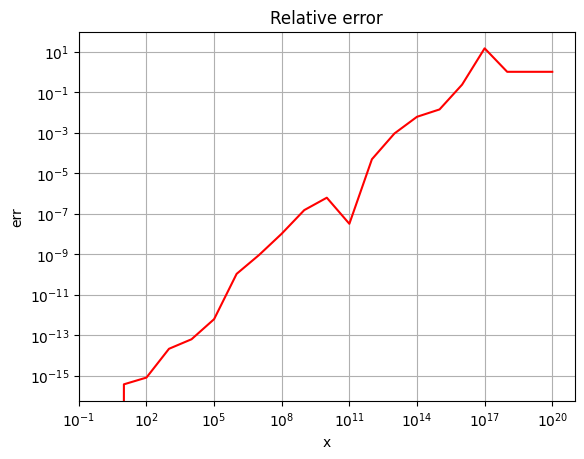

In [51]:
A = lambda x: (1 / x) - (1 / (x + 1))
B = lambda x: 1 / (x * (x + 1))
x = np.array([10 ** i for i in range(21)])
a = B(x)
fla = A(x)
err = np.abs(a - fla) / np.abs(a)
plt.loglog(x, err, "r")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("err")
plt.title("Relative error")
plt.show()

- **8.** Scrivere uno script Matlab che fornisca le approssimazioni di $e=\exp(1)$ ottenute con la formula
$f(n)=(1/n+1)^n$ per $n=10^k$ e  $k=0, ..., 16$. Visualizzare: un grafico con i valori di $f(n)$ al variare di n ed un grafico con i valori dell'errore relativo (considerando come valore esatto il valore math.exp(1)).  Cosa si osserva? Commentare i risultati ottenuti.